**[All Right Reserved Isio Technologies LLC](https://isiotech.com)**

In [1]:
import yfinance as yf
import pandas as pd

# Download Bitcoin historical data
btc_data = yf.download('BTC-USD', start='2024-06-10', end='2024-08-10')

# Prepare the data
btc_data = btc_data[['Close']]
btc_data = btc_data.reset_index(drop=True)

[*********************100%%**********************]  1 of 1 completed


In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(btc_data)

# Create sequences
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

# Adjust sequence length to be less than the length of the dataset
seq_length = min(30, len(scaled_data) // 2)  # Reduced seq_length for more training data
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
min_train_size = 10  # Or any other suitable number
train_size = max(int(len(X) * 0.8), len(X) - min_train_size)  # Use max to ensure non-negative train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.4157 - val_loss: 0.0434
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - loss: 0.3437 - val_loss: 0.0382
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.2474 - val_loss: 0.0523
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.1914 - val_loss: 0.0917
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.1456 - val_loss: 0.1662
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.0841 - val_loss: 0.2905
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0648 - val_loss: 0.4736
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0525 - val_loss: 0.6823
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0936 - val_loss: 0.7670
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.1106 - val_loss: 0.7346
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0768 - val_loss: 0.6502
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0833 - val_loss: 0.54

In [3]:
# Handle the case where X_test is empty
if X_test.size == 0:
    print("Warning: Test set is empty. Cannot evaluate model performance.")
else:
    # Predict the test set to evaluate the model
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)

# Predict the next 30 days
last_60_days = scaled_data[-60:]
next_30_days = []
for _ in range(30):
    prediction = model.predict(last_60_days[np.newaxis, :, :])
    next_30_days.append(prediction[0, 0])
    last_60_days = np.append(last_60_days, prediction, axis=0)[1:]

next_30_days = scaler.inverse_transform(np.array(next_30_days).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━

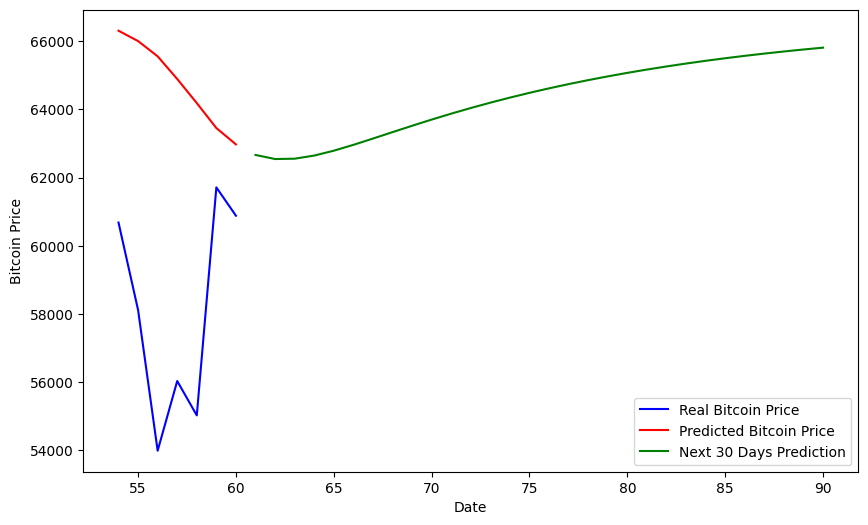

In [4]:
import matplotlib.pyplot as plt

# Plot the predicted prices
plt.figure(figsize=(10, 6))
plt.plot(btc_data.index[-len(y_test):], scaler.inverse_transform(y_test), color='blue', label='Real Bitcoin Price')
plt.plot(btc_data.index[-len(y_test):], predictions, color='red', label='Predicted Bitcoin Price')
plt.plot(range(len(btc_data), len(btc_data) + 30), next_30_days, color='green', label='Next 30 Days Prediction')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

"""Considerations

* LSTM models can be sensitive to hyperparameters. You might need to
experiment with different configurations for better results.

* This model uses only historical prices. Adding more features (like trading
volume, market sentiment data, etc.) could improve predictions.

* The model assumes that past performance can help predict future prices,
which may not always hold true in financial markets.

You can further develop this model by integrating it into a web app, similar to the
previous example, or by adding more advanced techniques to refine
the predictions."""